#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
Phase : 1
LC    : 2

'''

#2. IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#3. DATA LOADING

In [2]:
hrt_ori = pd.read_csv('heart.csv')

In [3]:
hrt = hrt_ori.copy()

In [4]:
hrt.shape

(303, 14)

In [5]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#4. DATA CLEANING

In [6]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(hrt.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(hrt)).round(2)*100
mv

,No. of missing values,% missing_values
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


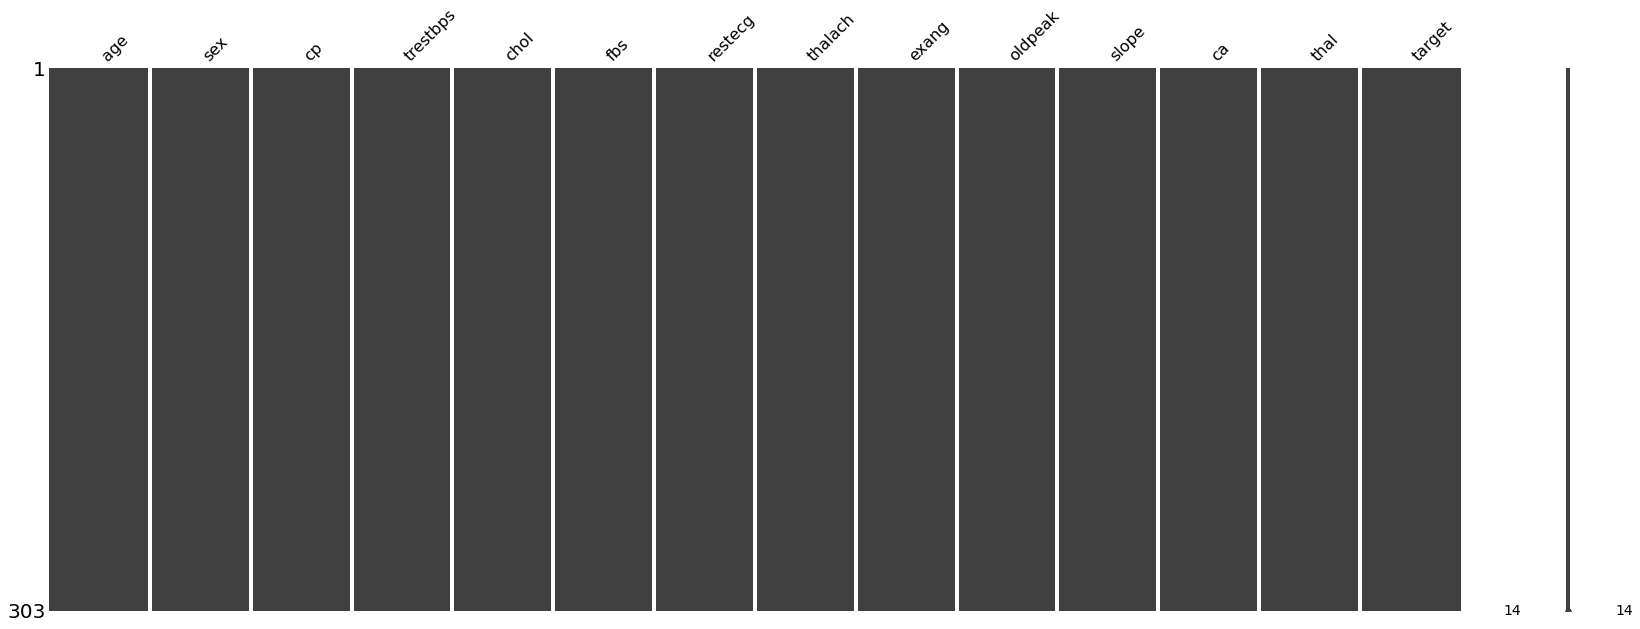

In [8]:
import missingno as msno

msno.matrix(hrt)  # just to visualize. no missing value.

Dataset yang akan digunakan bersih dari missing value

#5. EDA

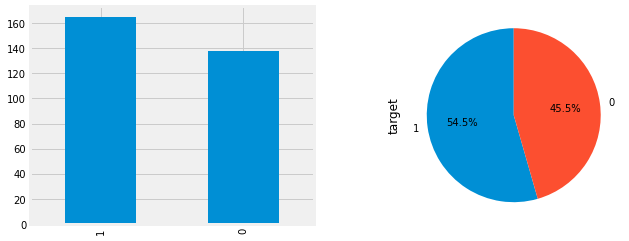

In [9]:
'''
Visualisasi variabel target (y)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
hrt['target'].value_counts().plot(kind='bar', ax=axs[0])
hrt['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel target memiliki 2 label, yaitu 0 (less chance of heart attack) and 1 (more chance of heart attack)
*   54.5% dari label target adalah 1, dan 45.5% adalah 0
*   Terlihat bahwa jumlah antara 1 dan 0 pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target saat data akan di split.

In [10]:
countNoDisease = len(hrt[hrt.target == 0])
countHaveDisease = len(hrt[hrt.target == 1])
print("Percentage of Patients less chance of heart attack: {:.2f}%".format((countNoDisease / (len(hrt.target))*100)))
print("Percentage of Patients more chance of heart attack: {:.2f}%".format((countHaveDisease / (len(hrt.target))*100)))

Percentage of Patients less chance of heart attack: 45.54%
Percentage of Patients more chance of heart attack: 54.46%


we can see that patients with more chance of heart attack dominate the dataset.

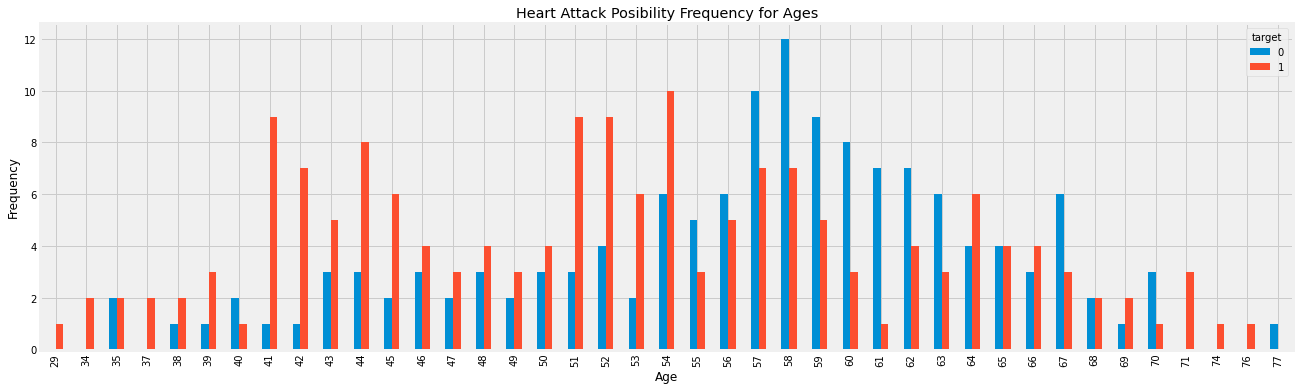

In [11]:
pd.crosstab(hrt.age,hrt.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Attack Posibility Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

*   We can see that patient with age 54 years old has the high posibility to get heart attack
*   <35 years old have more chance of heart attack 



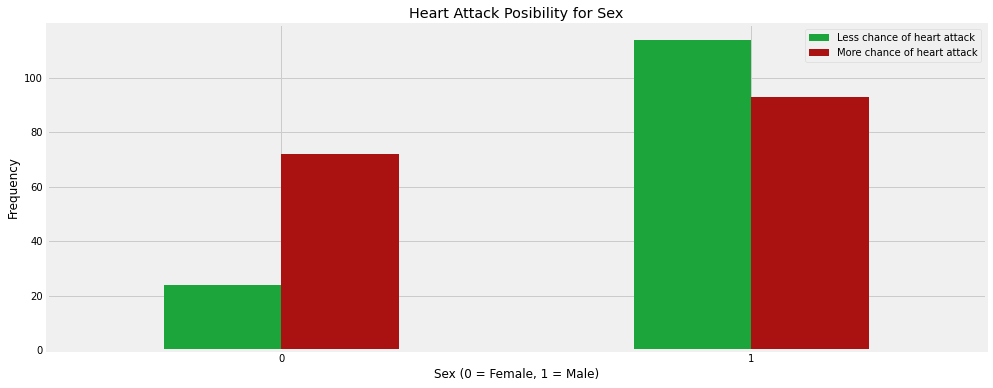

In [13]:
pd.crosstab(hrt.sex, hrt.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Attack Posibility for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Less chance of heart attack", "More chance of heart attack"])
plt.ylabel('Frequency')
plt.show()

*   Pasien dengan kemungkinan lebih besar terkena serangan jantung, lebih banyak didominasi oleh pasien pria
*   Pasien pria dengan penyakit jantung memiliki kemungkinan yang lebih besar dalam terkena serangan jantung.

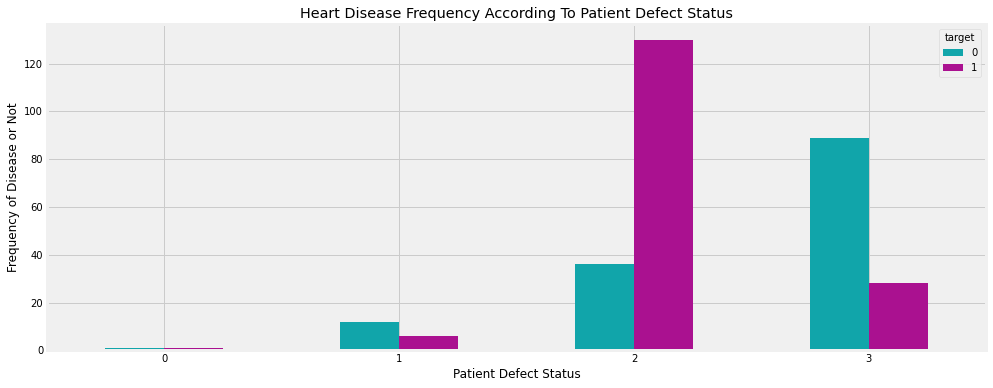

In [17]:
pd.crosstab(hrt.thal, hrt.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Patient Defect Status')
plt.xlabel('Patient Defect Status')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

0 = normal; 1 = fixed defect; 2 = reversable defect

ada sesuatu yang janggal mengenai keberadaan label 3 pada fitur thal. Keberadaan label 3 pada fitur thal tidak merepresentasikan status/kondisi,  pada source dataset label thal hanya 0, 1, 2 yang merepresentasikan masing-masing kondisi, sehingga saya memutuskan akan drop label 3 pada proses preprocessing data nanti. 

*   Pasien dengan kondisi reversable defect memiliki kemungkinan yang lebih besar untuk terkena serangan jantung.
*   Pasien dengan kondisi normal memiliki kemungkinan yang sangat kecil untuk terkena serangan jantung
*   **Status Defect Patient sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**





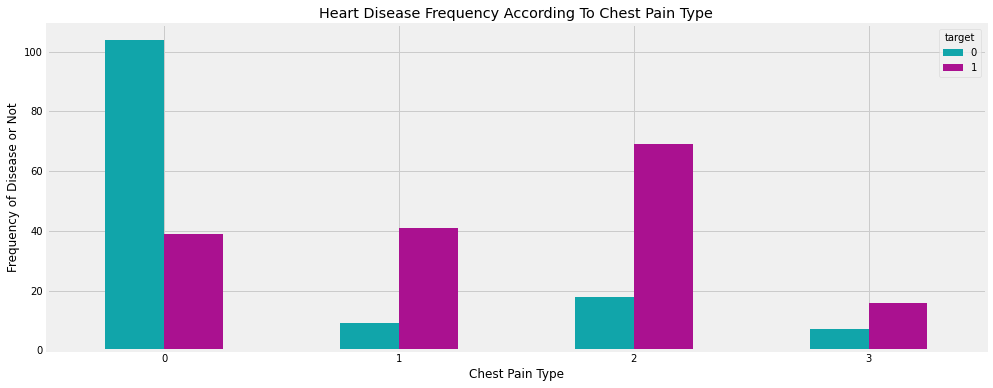

In [19]:
pd.crosstab(hrt.cp, hrt.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

cp: chest pain type

-- Value 1: typical angina (0)

-- Value 2: atypical angina (1)

-- Value 3: non-anginal pain (2)

-- Value 4: asymptomatic (3)

*   Pasien dengan chest pain type non-anginal pain (2) memiliki kemungkinan sangat besar untuk terkena serangan jantung dibandingkan dengan chest pain type lainnya
*   **Status Chest Pain Type sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


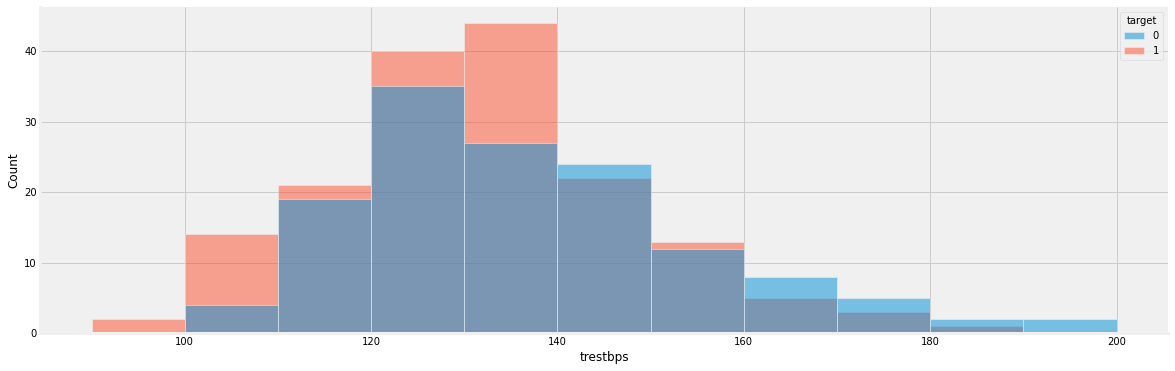

In [21]:
bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="trestbps", bins=bins, hue="target");
sns.despine(top=True, right=True)

*   Pasien dengan resting blood pressure <160 memiliki kemungkinan sangat besar untuk mengalami serangan jantung
*   **Besar kecilnya nilai pada fitur trestbps berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung**



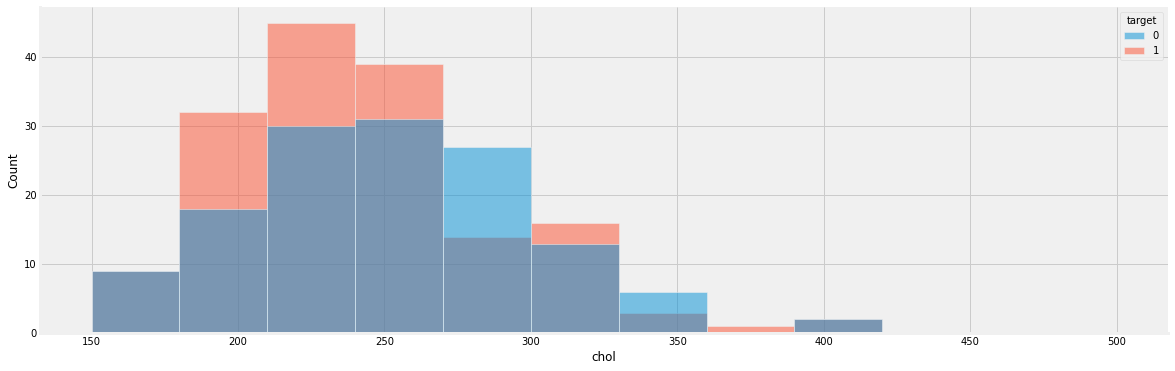

In [25]:
bins = [150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 500]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="chol", bins=bins, hue="target");
sns.despine(top=True, right=True)

**Besar kecilnya nilai pada fitur chol tidak berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung**

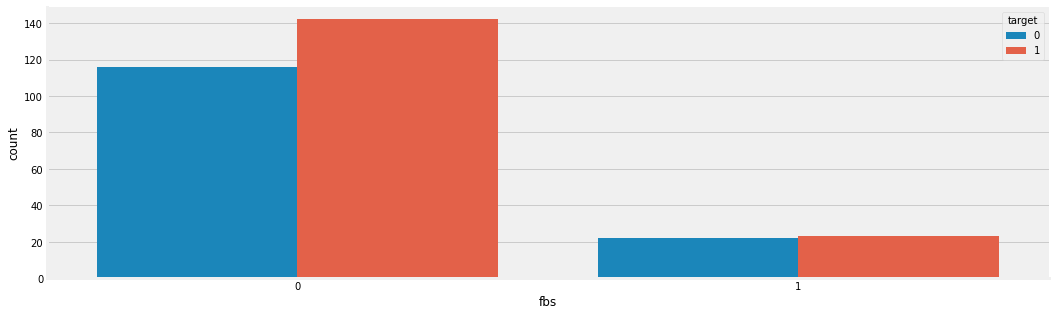

In [27]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="fbs", hue="target");
sns.despine(top=True, right=True)

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

*   Pasien dengan fasting blood sugar <= 120 memiliki kemungkinan sangat besar mengalami serangan jantung
*    **Status Fasting blood sugar sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


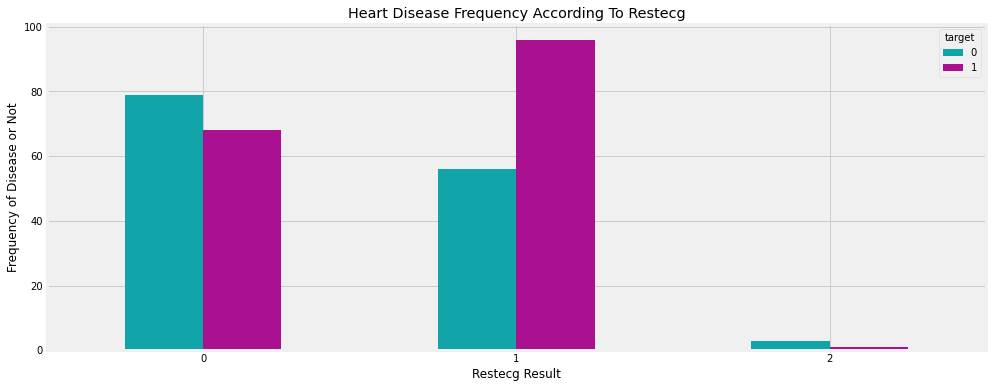

In [29]:
pd.crosstab(hrt.restecg, hrt.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Restecg')
plt.xlabel('Restecg Result')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*   Pasien dengan restecg result 1 memiliki kemungkinan sangat besar untuk terkena serangan jantung dibandingkan dengan restecg result lainnya
*   **Status restecg result sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


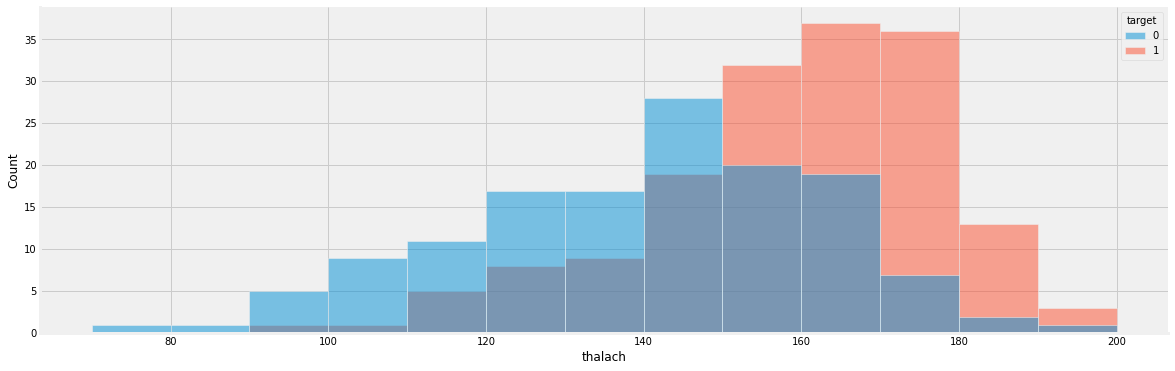

In [31]:
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="thalach", bins=bins, hue="target");
sns.despine(top=True, right=True)

*   Pasien dengan maximum heart rate achieved >160 memiliki kemungkinan sangat besar untuk mengalami serangan jantung
*   **Besar kecilnya nilai pada fitur thalac berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung**


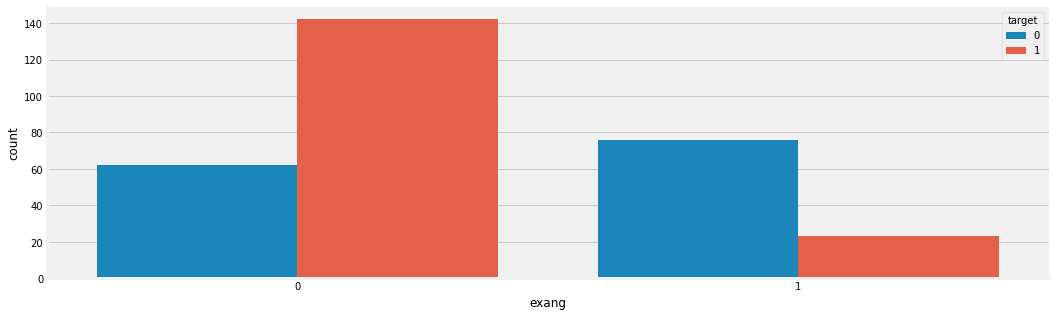

In [33]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="exang", hue="target");
sns.despine(top=True, right=True)

 exang: exercise induced angina (1 = yes; 0 = no)

*   Pasien dengan exercise induced angina memiliki kemungkinan sangat besar mengalami serangan jantung
*    **Status exercise induced angina berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


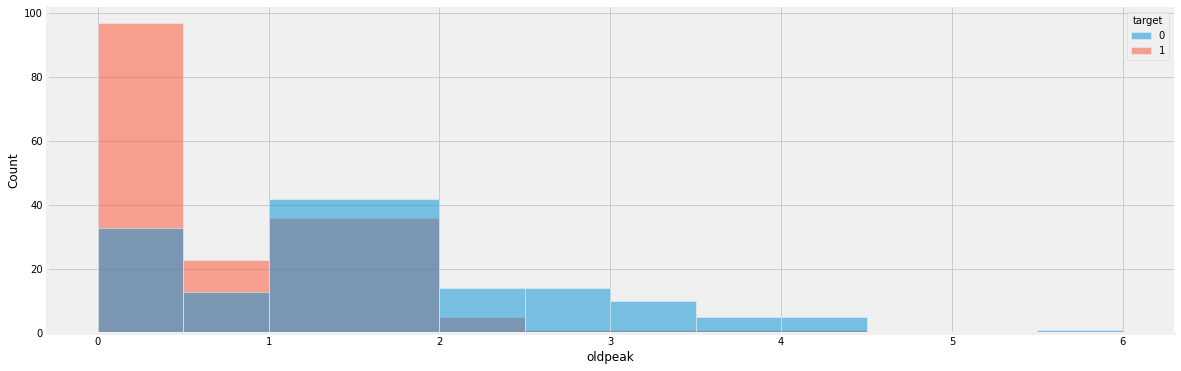

In [35]:
bins = [0, 0.5, 1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="oldpeak", bins=bins, hue="target");
sns.despine(top=True, right=True)

oldpeak = ST depression induced by exercise relative to rest

*   Pasien dengan oldpeak <1.0 memiliki kemungkinan sangat besar untuk mengalami serangan jantung
*   **Besar kecilnya nilai pada fitur oldpeak berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung**


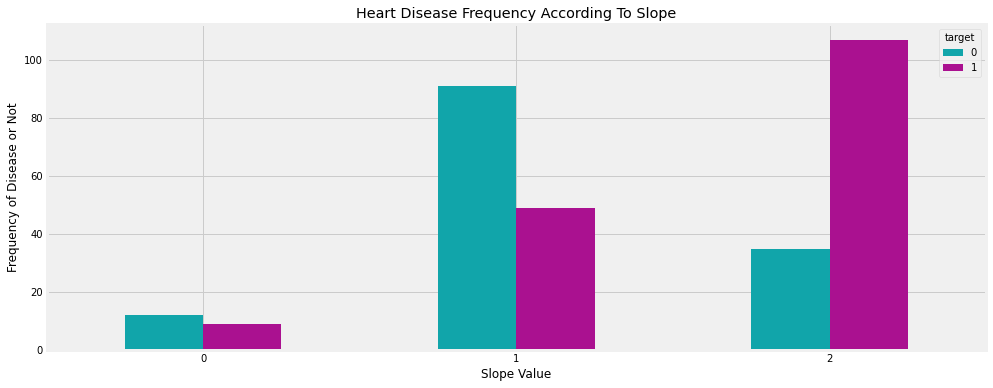

In [37]:
pd.crosstab(hrt.slope, hrt.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Slope')
plt.xlabel('Slope Value')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

slope: the slope of the peak exercise ST segment

-- Value 1: upsloping (0)

-- Value 2: flat (1)

-- Value 3: downsloping (2)

*   Pasien dengan slope value 2 (downsloping) memiliki kemungkinan sangat besar untuk terkena serangan jantung dibandingkan dengan slope value lainnya
*   **Status restecg result sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


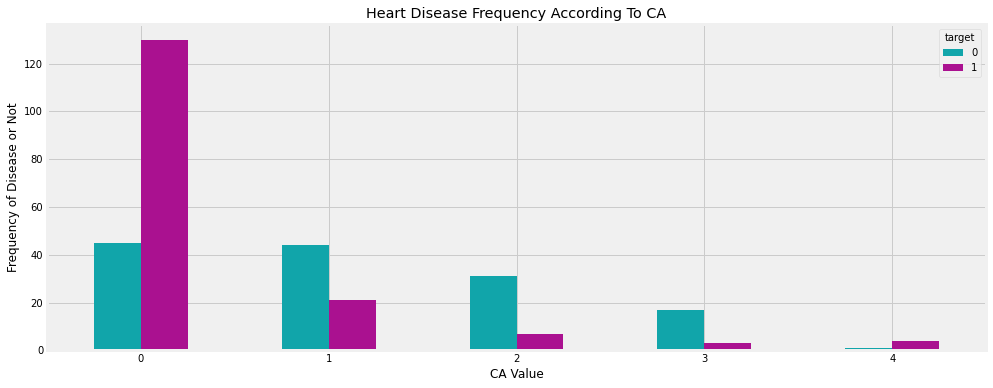

In [39]:
pd.crosstab(hrt.ca, hrt.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To CA')
plt.xlabel('CA Value')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

ca: number of major vessels (0-3) colored by flourosopy

*   Pasien dengan ca value 0memiliki kemungkinan sangat besar untuk terkena serangan jantung dibandingkan dengan slope value lainnya
*   **Status ca value sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien**


**KESIMPULAN BASED ON EDA**

---

Faktor (fitur) yang mempengaruhi terjadinya serangan jantung pada pasien adalah:


*   Patient with age <35 years old have more chance of heart attack (AGE)
*   Pasien pria dengan penyakit jantung memiliki kemungkinan yang lebih besar dalam terkena serangan jantung (SEX)
*   Status Defect Patient sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Status Chest Pain Type sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur trestbps berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung
*   Status Fasting blood sugar sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien (FBS)
*   Status restecg result sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur thalac berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung)
*   Status exercise induced angina berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur oldpeak berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung)
*   Status ca value sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien











#6. PREPROCESSING DATA

###6.1 HANDLING ABNORMAL CATEGORY PADA FITUR THAL

In [42]:
hrt.groupby(by=[hrt['thal'],'target'])['age'].count().to_frame()

age
thal target     
0    0         1
     1         1
1    0        12
     1         6
2    0        36
     1       130
3    0        89
     1        28

0 = normal; 1 = fixed defect; 2 = reversable defect

ada sesuatu yang janggal mengenai keberadaan label 3 pada fitur thal. Keberadaan label 3 pada fitur thal tidak merepresentasikan status/kondisi,  pada source dataset label thal hanya 0, 1, 2 yang merepresentasikan masing-masing kondisi, sehingga saya memutuskan akan drop label 3 pada proses preprocessing data ini.

In [44]:
hrt = hrt[(hrt.thal !=3)]
hrt.shape

(186, 14)

In [45]:
hrt_ori.shape

(303, 14)

Namun jika kita drop kategori 3 pada fitur thal, kita akan kehilangan hampir 50% dari dataset yang kita punya. Dan akan mempengaruhi proses train model, karena model belajar dengan data yang lebih sedikit dan akan berakibat pada performansi model.

Sehingga saya memutuskan untuk treat kategori 3 pada fitur thal sebagai unknown kategori.

**untuk proses seterusnya saya akan menggunakan dataset ori (hrt_ori) dikarenakan dataset yang digunakan pada proses sebelumnya sudah tidak complete lagi**

###6.2 HEATMAP CORRELATION

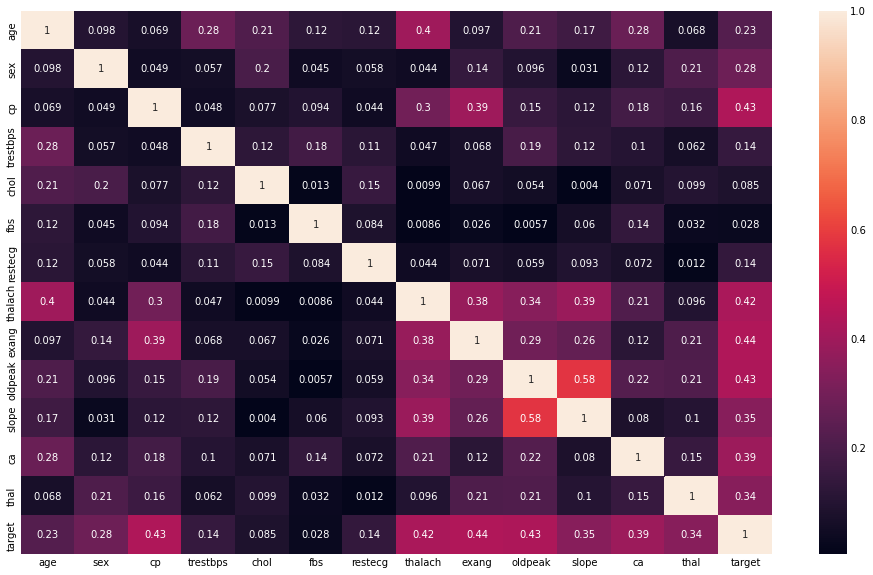

In [46]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(15, 10))
sns.heatmap(hrt_ori.corr().abs(),  annot=True)
plt.show()

exang, oldpeak, cp, thalach, ca, slope, thal merupakan fitur yang memiliki nilai korelasi tertinggi (>0.30) terhadap fitur target

###6.3 SPLIT DATA

In [47]:
X = hrt_ori.drop('target', axis = 1)
y = hrt_ori.target

In [67]:
y.shape

(303,)

In [68]:
X.shape

(303, 13)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 28)

In [73]:
X_train.shape

(242, 13)

In [72]:
y_train.shape

(242,)

###6.4 FEATURE SELECTION

Saya memilih fitur berdasarkan hasil nilai korelasi >0.30 pada visualisasi heatmap.

**exang, oldpeak, cp, thalach, ca, slope, thal merupakan fitur yang memiliki nilai korelasi tertinggi (>0.30) terhadap fitur target**

In [49]:
X_train = hrt_ori.loc[:, ['exang', 'oldpeak', 'cp', 'thalach', 'ca', 'slope', 'thal']]
X_test = hrt_ori.loc[:, ['exang', 'oldpeak', 'cp', 'thalach', 'ca', 'slope', 'thal']]

In [60]:
y_train.shape

(242,)

#7. BUILD PIPELINE & HYPERPARAMETER TUNNING

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

pipe_dt = Pipeline([
('scaler', StandardScaler()),
('classifier', DecisionTreeClassifier(max_depth= 2,random_state=28))])

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())])

#Decision Tree
param_dt = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__criterion':['gini','entropy'],
            'classifier__max_depth':np.arange(2,8),
            'classifier__min_samples_split':np.arange(2,8),
            'classifier__min_samples_leaf':np.arange(2,8),
            'classifier__max_features':['auto','sqrt','log2']
            }

#Random Forest
param_rf = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

#8. TRAIN MODEL AND EVALUATION

In [52]:
from sklearn.model_selection import GridSearchCV

###8.1 DECISION TREE

In [77]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

Model Decision Tree Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 2 menit 39 detik

In [78]:
print('Training set score: ' + str(grid_dt.score(X_train, y_train)))
print('Test set score: ' + str(grid_dt.score(X_test, y_test)))

Training set score: 0.8760330578512396
Test set score: 0.7377049180327869


Setelah di tuning model decision tree maka dihasilkan akurasi untuk training sebesar 87.60% dan testing sebesar 73.77%

In [79]:
# Access the best set of parameters
best_params_dt = grid_dt.best_params_
print(best_params_dt)

# simpan optimum model
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
 
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 2, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, max_features='auto',
                                        min_samples_leaf=6, random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth',
       'param_classifier__max_features', 'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__criterion terbaik untuk digunakan dalam kasus ini adalah gini
*   classifier__max_depth terbaik untuk digunakan dalam kasus ini sebesar 6
*   classifier__max_features terbaik untuk digunakan dalam kasus ini adalah auto
*   classifier__min_samples_leaf terbaik untuk digunakan dalam kasus ini sebesar 6
*   classifier__min_sample_split terbaik untuk digunakan dalam kasus ini adalah sebesar 2
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar Standard Scaler

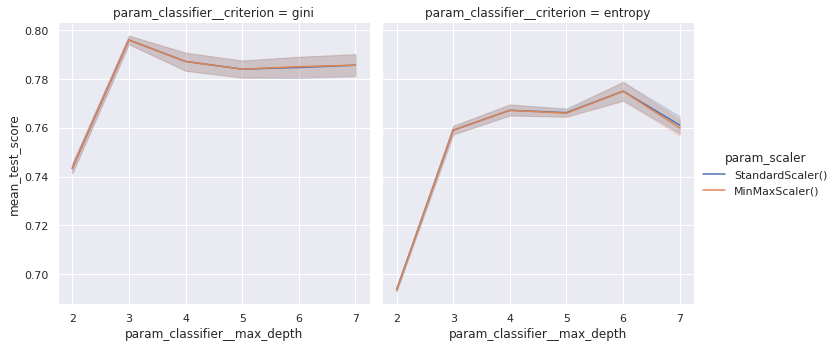

In [80]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_dt,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__criterion')
plt.show()

Dari gambar diatas dapat kita lihat bahwa penentuai *max_depth* dan *criterion* pada Decision Tree Classifier sangat mempengaruhi model yang dibuat, namun teknik normalisasi antara StandarScaler dan MinMaxScaler tidak begitu berpengaruh pada algoritma yang non-linear seperti Decision Tree. 

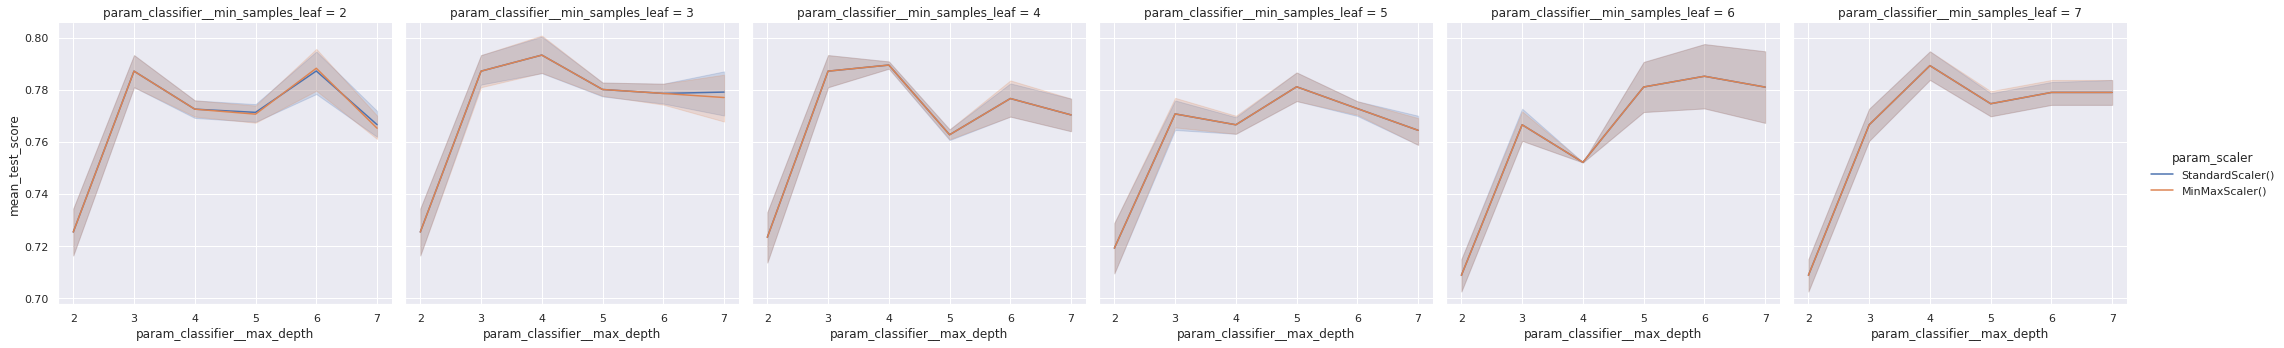

In [81]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_dt,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__min_samples_leaf')
plt.show()

Dari gambar diatas dapat kita lihat bahwa selain *max_depth*, nilai *min_samples_leaf* pada Decision Tree Classifier sangat mempengaruhi model.

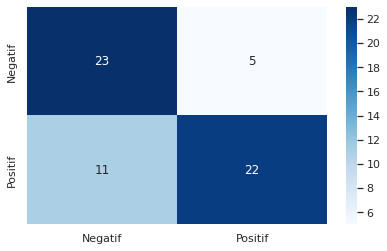

In [83]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_dt = confusion_matrix(y_test, best_pipe_dt.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_dt, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Decision Tree terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi target pada data test terprediksi benar sebanyak 23 dan 5 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi target pada data test terprediksi benar sebanyak 22 dan 11 terprediksi salah sebagai 0 (No)

In [85]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.81      0.67      0.73        33

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



Pada classification report model Logistic Regression terlihat bahwa:
*   Precision untuk kelas 0 sebesar 68%, untuk kelas 1 sebesar 81%
*   Recall untuk kelas 0 sebesar 82%, untuk kelas 1 sebesar 67%
*   F1 score untuk kelas 0 sebesar 74%, untuk kelas 1 sebesar 73%

###8.2 RANDOM FOREST

In [84]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

Model Random Forest Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 11 menit 32 detik

In [86]:
print('Training set score: ' + str(grid_rf.score(X_train, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.9256198347107438
Test set score: 0.8360655737704918


Setelah di tuning model decision tree maka dihasilkan akurasi untuk training sebesar 92.56% dan testing sebesar 83.60%

In [87]:
# Access the best set of parameters
best_params_rf = grid_rf.best_params_
print(best_params_rf)

# simpan optimum model
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
 
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 50, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 300, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=50, max_features=3,
                                        min_samples_leaf=5, min_samples_split=8,
                                        n_estimators=300))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__max_features',
       'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__max_dept terbaik untuk digunakan dalam kasus ini adalah sebesar 50
*   classifier__max_features terbaik untuk digunakan dalam kasus ini sebesar 3
*   classifier__min_samples_leaf terbaik untuk digunakan dalam kasus ini adalah 5
*   classifier__min_sample_split terbaik untuk digunakan dalam kasus ini adalah sebesar 8

*   classifier_n_estimator terbaik untuk digunakan dalam kasus ini adalah sebesar 300
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar StandardScaler

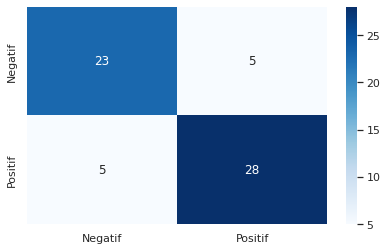

In [88]:
# Cek confusion matrix
cf_matrix_rf = confusion_matrix(y_test, best_pipe_rf.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Random Forest terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi target pada data test terprediksi benar sebanyak 23 dan 5 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi target pada data test terprediksi benar sebanyak 28 dan 5 terprediksi salah sebagai 0 (No)

In [89]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Pada classification report model Decision Tree Classifier terlihat bahwa:
*   Precision untuk kelas 0 sebesar 82%, untuk kelas 1 sebesar 85%
*   Recall untuk kelas 0 sebesar 82%, untuk kelas 1 sebesar 85%
*   F1 score untuk kelas 0 sebesar 82%, untuk kelas 1 sebesar 85%

#9. PERBANDINGAN MODEL

In [90]:
dt = grid_dt.score(X_test, y_test)
rf = grid_rf.score(X_test, y_test)

print(round(dt,4))
print(round(rf,4))

0.7377
0.8361


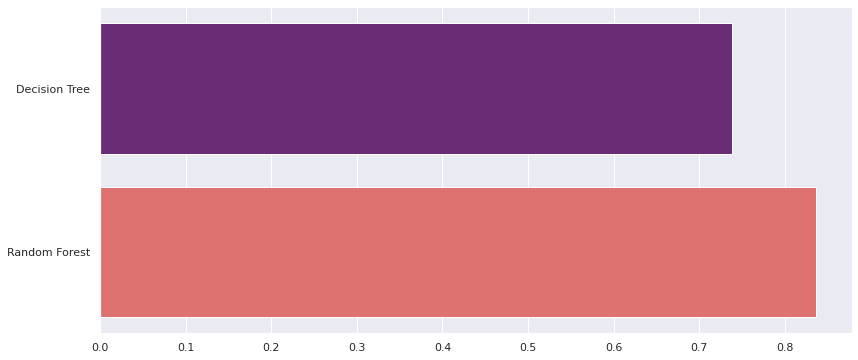

In [91]:
plt.figure(figsize=(12,6))
model_acc = [dt, rf]
model_name = ['Decision Tree', 'Random Forest']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [92]:
from sklearn.metrics import f1_score, recall_score

models = {
    'dt':best_pipe_dt,
    'rf':best_pipe_rf
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

hrt_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models.keys():
        hrt_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [93]:
hrt_model

,dt,rf
f1_score,0.733333,0.848485
recall,0.666667,0.848485


#10. MODEL INFERENCE

###10.1 DECISION TREE

In [125]:
from sklearn.utils import shuffle

In [126]:
hrt_inf = shuffle(hrt_ori)
hrt_inf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1


In [127]:
X_inf = hrt_inf.loc[:, ['exang', 'oldpeak', 'cp', 'thalach', 'ca', 'slope', 'thal']]
y_inf = hrt_inf['target']

In [130]:
best_pipe_dt.fit(X_inf, y_inf)
print('Score: ',round(best_pipe_dt.score(X_inf, y_inf),4))

Score:  0.868


In [133]:
y_inv_pred = best_pipe_dt.predict(X_inf)
y_inv_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [134]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 0.0 %
no precentage: 100.0 %


###10.2 RANDOM FOREST

In [135]:
best_pipe_rf.fit(X_inf, y_inf)
print('Score: ',round(best_pipe_rf.score(X_inf, y_inf),4))

Score:  0.8878


In [136]:
y_inv_pred = best_pipe_rf.predict(X_inf)
y_inv_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [137]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 0.0 %
no precentage: 100.0 %


#11. KESIMPULAN

###11.1 EDA ANALYSIS

**KESIMPULAN BASED ON EDA**

---

Faktor (fitur) yang mempengaruhi terjadinya serangan jantung pada pasien adalah:


*   Patient with age <35 years old have more chance of heart attack (AGE)
*   Pasien pria dengan penyakit jantung memiliki kemungkinan yang lebih besar dalam terkena serangan jantung (SEX)
*   Status Defect Patient sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Status Chest Pain Type sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur trestbps berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung
*   Status Fasting blood sugar sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien (FBS)
*   Status restecg result sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur thalac berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung)
*   Status exercise induced angina berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien
*   Besar kecilnya nilai pada fitur oldpeak berpengaruh terhadap hasil target (besar kecilnya kemungkinan terjadinya serangan jantung)
*   Status ca value sangat berpengaruh terhadap besar kecilnya terjadinya serangan jantung pada pasien

###11.2 MODEL ANALYSIS

Dari project yang saya buat terdapat beberapa fitur numerik yang berkolerasi tinggi (+0.30) yaitu:

1. exang
2. oldpeak
3. cp
4. thalac
5. ca
6. slope
7. thal

---

Dari 9 fitur tersebut kemudian saya membuat beberapa model dan melakukan GridSearchCV (cv = 5) dengan beberapa parameter:
1. Decision Tree Classifier
    - Best Parameters = (criterion = 'entropy', max_depth = 7, max_features='auto', min_samples_leaf=4 dan yang lainnya default)
    - Accuracy = Training set score: 0.8760 Test set score: 0.7377

2. Random Forest Classifier
    - Best Parameters = (max_depth = 10, max_features = 3, min_samples_leaf = 4, min_samples_split = 10 dan yang lainnya default)
    - Accuracy = Training set score: 0.9256 Test set score: 0.8360


---

Model yang terbaik adalah Random Forest Classifier dengan accuracy, F1-Score, Recall, Precision yang lebih tinggi
